# Open-Ended Grounding in OCID dataset

In [1]:
cd ..

/home/owner/OWG


In [3]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-cshqdjxk
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-cshqdjxk
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369549 sha256=d5c48ecd8bc6008828947eab95bf6a75660733aaac630fd024d2b67126ee2017
  Stored in directory: /tmp/pip-ephem-wheel-cache-gths1rl5/wheels/35/3e/df/3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully built clip

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import FancyBboxPatch
import json 
import clip
import torch
from tqdm import tqdm

# helper function
def display_image(path_or_array, size=(10, 10)):
  if isinstance(path_or_array, str):
    image = np.asarray(Image.open(open(image_path, 'rb')).convert("RGB"))
  else:
    image = path_or_array
  
  plt.figure(figsize=size)
  plt.imshow(image)
  plt.axis('off')
  plt.show()

In [5]:
from getpass import getpass

openai_api_key = getpass()

In [ ]:
# either set your openai key environment variable
#openai_api_key = os.environ['OPENAI_API_KEY']

# or read from getpass
os.environ['OPENAI_API_KEY'] = openai_api_key

In [8]:
from owg.visual_prompt import VisualPrompterGrounding

### Example inference with OWG

Load example image from OCID

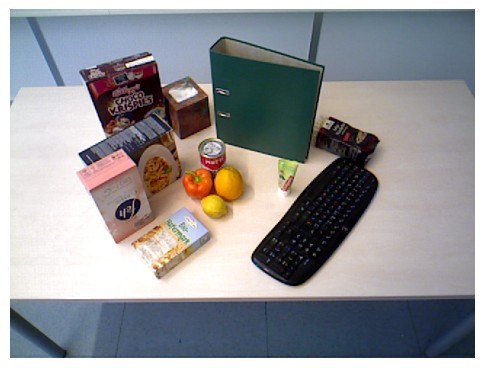

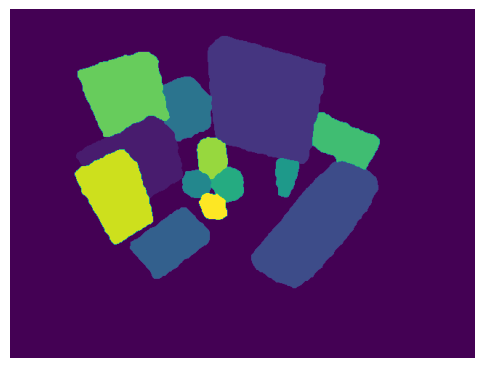

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


In [9]:
img_path = './media/example_rgb_2018-08-21-11-40-54.png'
mask_path = './media/example_mask_2018-08-21-11-40-54.png'

image_pil = Image.open(img_path)
image_np = np.array(image_pil)
ins_mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)
obj_ids = np.unique(ins_mask)[1:]

#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display_image(image_pil, (6,6))
display_image(ins_mask, (6,6))
print(obj_ids)

In [10]:
grounder = VisualPrompterGrounding('config/ocid/OWG.yaml', debug=True)

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


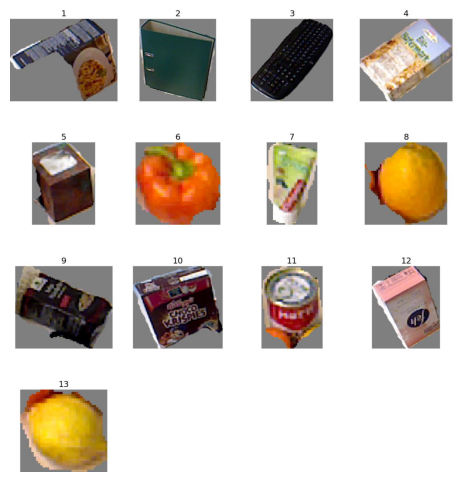

In [11]:
# display mark-based prompt
all_masks = np.stack([ins_mask == objID for objID in obj_ids])
visual_prompt, out_data = grounder.prepare_image_prompt(
    image_pil, {'masks':all_masks})
marked_image_grounding = visual_prompt[1]
image_grounding = out_data['raw_image']
markers = out_data['markers']

display_image(marked_image_grounding, (6,6))

In [12]:
# example referring queries
queries = [
    "binder",
    "lemon",
    "bell pepper",
    "Choco krispies",
    "cube",
    "pink tissues package",
    "black food package",
    "tomato soup can",
    "leftmost fruit",
    "pasta box standing on its side, left from bell pepper",
    "I want to wash my teeth",
    "I want to send an email"
]

binder
GPT response:
The binder in the image is the green object standing upright on the right side of the table.

In the marked image, the binder corresponds to ID 2.

My final answer is: [2]



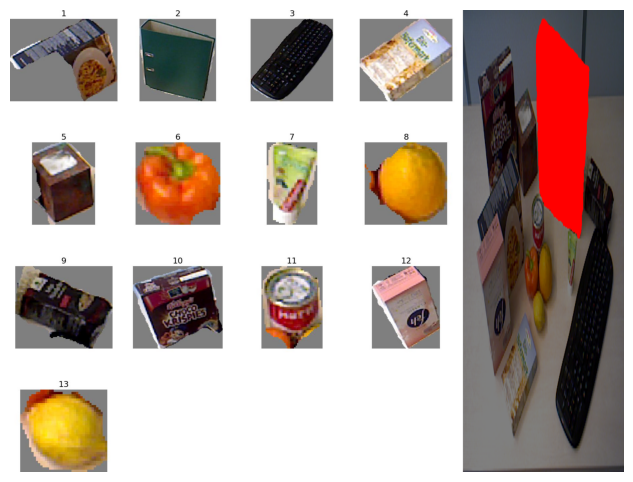

------------------------------------------------------------------------------------------------------------------------------
lemon
GPT response:
The lemon in the raw image is located near the center, next to the bell pepper and the can. In the marked image, the lemon corresponds to ID 8.

My final answer is: [8]



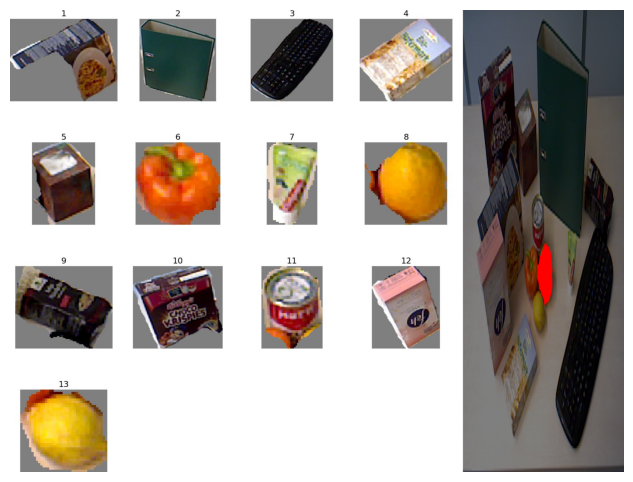

------------------------------------------------------------------------------------------------------------------------------
bell pepper
GPT response:
The bell pepper in the image is the orange object located near the center. In the marked image, it corresponds to ID 6.

My final answer is: [6]



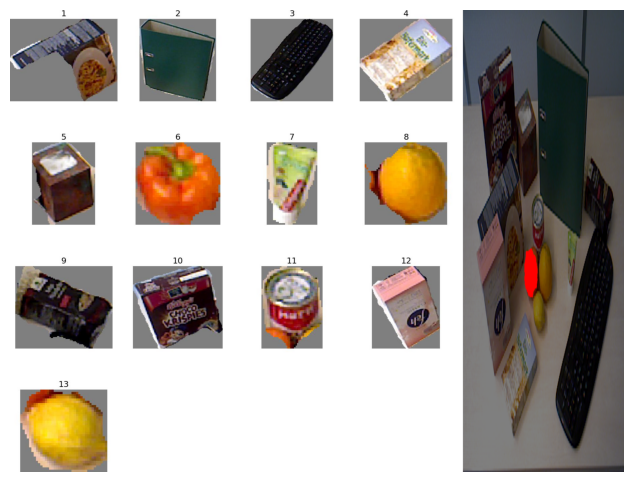

------------------------------------------------------------------------------------------------------------------------------
Choco krispies
GPT response:
To find the "Choco Krispies" in the image, I will look for the box with the "Choco Krispies" label.

1. In the raw image, the "Choco Krispies" box is located at the back left.
2. In the marked image, this corresponds to object ID 10.

My final answer is: [10]



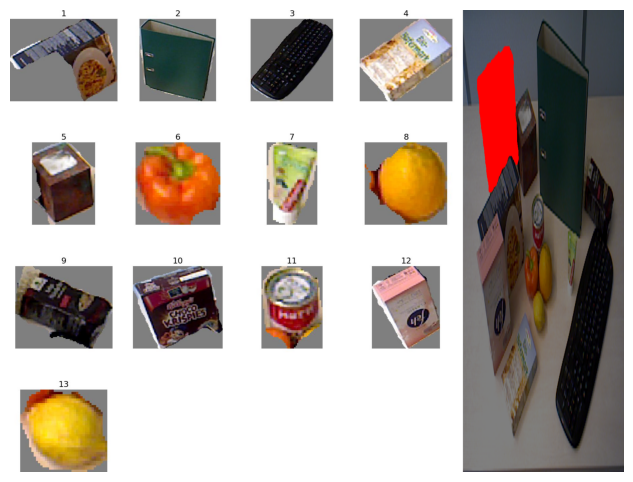

------------------------------------------------------------------------------------------------------------------------------
cube
GPT response:
To identify the cube, I need to look for an object with a cube-like shape. In the images, object 5 appears to be a cube.

My final answer is: [5]



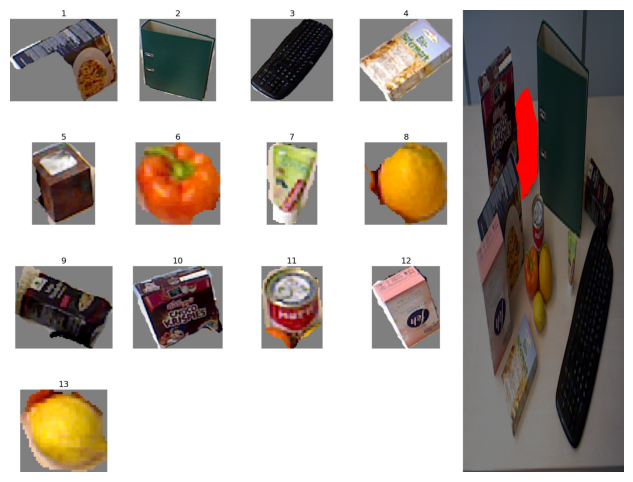

------------------------------------------------------------------------------------------------------------------------------
pink tissues package
GPT response:
The pink tissues package is located in the bottom left area of the image. In the marked image, it corresponds to ID 12.

My final answer is: [12]



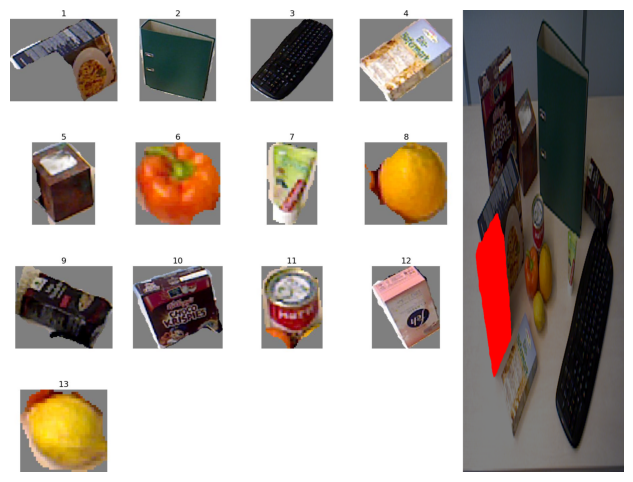

------------------------------------------------------------------------------------------------------------------------------
black food package
GPT response:
To find the black food package, I will look for a package that is predominantly black in color.

1. In the raw image, the package on the far right, next to the keyboard, is black.
2. In the marked image, this corresponds to ID 9.

My final answer is: [9]



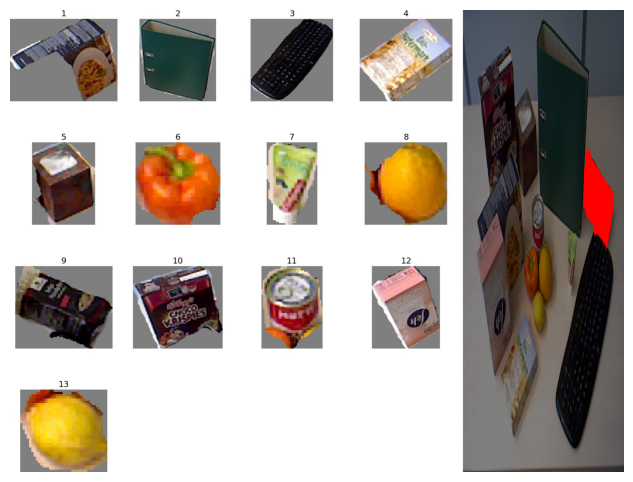

------------------------------------------------------------------------------------------------------------------------------
tomato soup can
GPT response:
The tomato soup can is the object labeled with "Hunt's" in the raw image. In the marked image, this corresponds to ID 11.

My final answer is: [11]



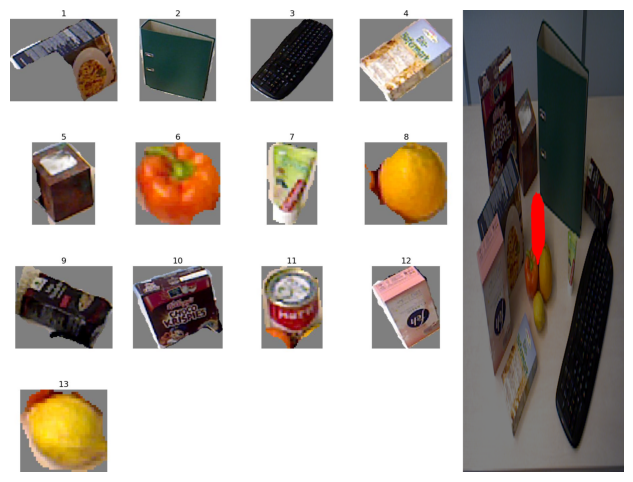

------------------------------------------------------------------------------------------------------------------------------
leftmost fruit
GPT response:
To find the leftmost fruit, we need to identify the fruits in the image and determine which one is positioned furthest to the left.

In the raw image, there are two fruits visible: an orange bell pepper and a lemon. The orange bell pepper is positioned to the left of the lemon.

Now, let's find the ID of the orange bell pepper in the marked image.

- The orange bell pepper corresponds to ID 6.

My final answer is: [6]



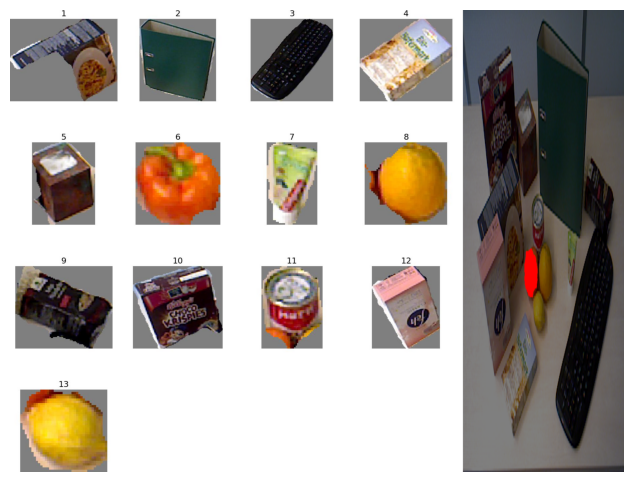

------------------------------------------------------------------------------------------------------------------------------
pasta box standing on its side, left from bell pepper
GPT response:
To find the pasta box standing on its side, left from the bell pepper, follow these steps:

1. Identify the bell pepper in the raw image. It is the orange object near the center. In the marked image, this is ID 6.

2. Look to the left of the bell pepper in the raw image to find the pasta box standing on its side. It is the blue box with a pasta image on it. In the marked image, this is ID 1.

My final answer is: [1]



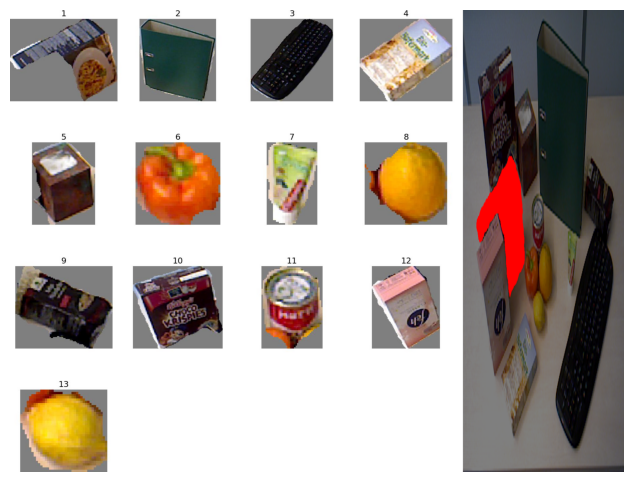

------------------------------------------------------------------------------------------------------------------------------
I want to wash my teeth
GPT response:
To wash your teeth, you would typically use toothpaste. In the image, the object that resembles a tube of toothpaste is labeled as ID 7.

My final answer is: [7]



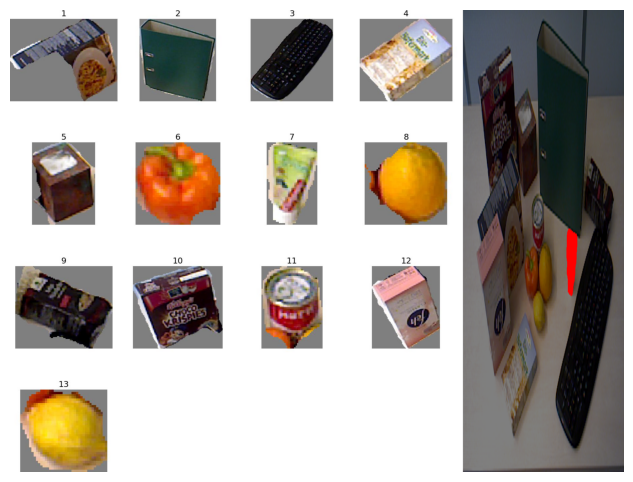

------------------------------------------------------------------------------------------------------------------------------
I want to send an email
GPT response:
To send an email, you would need a keyboard. 

In the images, the keyboard is visible. Let's identify it:

- The keyboard is located on the right side of the raw image.
- In the marked image, the keyboard is labeled with ID 3.

My final answer is: [3]



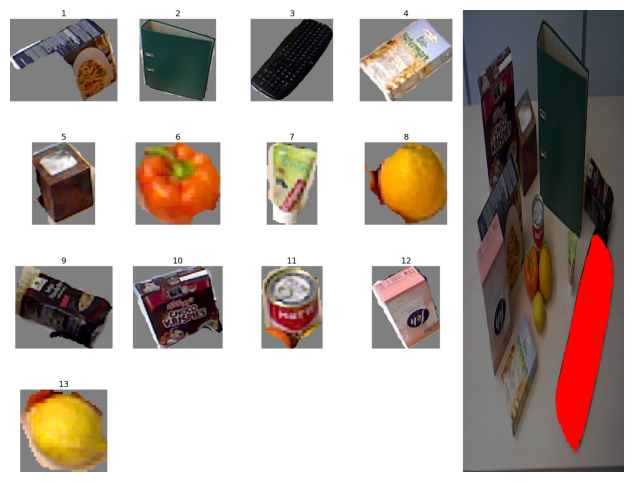

------------------------------------------------------------------------------------------------------------------------------


In [14]:
for user_input in queries:
    print(user_input)
    _, output_mask, _ = grounder.request(
        text_query=user_input, image=image_pil, data={'masks':all_masks}
    )
    canvas = (0.5 * np.array(image_grounding).copy()).astype(np.uint8)
    canvas[output_mask == True, :] = np.array([255, 0, 0])

    # Original code
    # display_image(np.hstack([marked_image_grounding, canvas]), (12,6))
    # print('---' * 42)

    # 🔹 Convert PIL image to NumPy array
    marked_array = np.array(marked_image_grounding)

    # Ensure both images have the same height before stacking
    if canvas.shape[0] != marked_array.shape[0]:
        canvas = cv2.resize(canvas, (canvas.shape[1], marked_array.shape[0]))

    # Display the images side by side
    display_image(np.hstack([marked_image_grounding, canvas]), (12, 6))
    print('---' * 42)

Load dataset and metrics

In [84]:
import pickle

with open("/home/owner/OWG/_dumps/ocid_subset_grounding_v4.pkl", "rb") as f:
    test_dataset = pickle.load(f)


print(type(test_dataset))
print(test_dataset.keys())
first_key = next(iter(test_dataset))
print(test_dataset[first_key])

<class 'dict'>
dict_keys(['semantic_relations', 'visual_relations', 'multi_hop', 'spatial_relations', 'affordance', 'name', 'attribute'])
[{'img': array([[[68, 71, 51],
        [71, 74, 55],
        [68, 75, 57],
        ...,
        [50, 59, 43],
        [50, 58, 49],
        [51, 59, 50]],

       [[62, 71, 56],
        [64, 73, 59],
        [65, 73, 55],
        ...,
        [52, 55, 40],
        [49, 57, 48],
        [49, 57, 48]],

       [[65, 73, 53],
        [65, 73, 53],
        [67, 74, 56],
        ...,
        [48, 56, 46],
        [48, 56, 46],
        [48, 56, 46]],

       ...,

       [[51, 65, 65],
        [43, 56, 56],
        [56, 62, 65],
        ...,
        [40, 42, 27],
        [39, 43, 35],
        [34, 38, 30]],

       [[65, 73, 64],
        [64, 72, 63],
        [59, 66, 64],
        ...,
        [40, 42, 27],
        [35, 42, 40],
        [32, 40, 37]],

       [[67, 74, 56],
        [69, 77, 58],
        [65, 73, 55],
        ...,
        [40, 38, 25],
    

In [85]:
# test_dataset = torch.load("/home/owner/OWG/_dumps/ocid_subset_grounding_v4.pkl", weights_only=False)

In [86]:
# referring segmentation
def segmentation_metrics(preds, masks, device):
    iou_list = []
    for pred, mask in zip(preds, masks):
        # pred: (H, W): bool, mask: (H, W): bool
        # iou
        inter = np.logical_and(pred, mask)
        union = np.logical_or(pred, mask)
        iou = np.sum(inter) / (np.sum(union) + 1e-6)
        iou_list.append(iou)
    iou_list = np.stack(iou_list)
    iou_list = torch.from_numpy(iou_list).to(device)
    prec_list = []
    for thres in torch.arange(0.5, 1.0, 0.1):
        tmp = (iou_list > thres).float().mean()
        prec_list.append(tmp)
    iou = iou_list.mean()
    iou_std = iou_list.var()
    prec = {}
    temp = '  '
    for i, thres in enumerate(range(5, 10)):
        key = 'Pr@{}'.format(thres * 10)
        value = prec_list[i].item()
        prec[key] = value
        temp += "{}: {:.2f}  ".format(key, 100. * value)
    head = 'Evaluation: IoU (mean)={:.2f}, (std)={:.2f}'.format(100. * iou.item(), 100. * iou_std.item())
    return head + temp, {'iou': iou.item(), 'iou_std': iou_std.item(), **prec}

## Evaluation CLIP

CLIP utils

In [87]:
def article(name):
  return 'an' if name[0] in 'aeiou' else 'a'

def processed_name(name, rm_dot=False):
  # _ for lvis
  # / for obj365
  res = name.replace('_', ' ').replace('/', ' or ').lower()
  if rm_dot:
    res = res.rstrip('.')
  return res

single_template_imagenet = [
    'a photo of {article} {}.'
]

multiple_templates_imagenet = [
    'There is {article} {} in the scene.',
    'There is the {} in the scene.',
    'a photo of {article} {} in the scene.',
    'a photo of the {} in the scene.',
    'a photo of one {} in the scene.',


    'itap of {article} {}.',
    'itap of my {}.',  # itap: I took a picture of
    'itap of the {}.',
    'a photo of {article} {}.',
    'a photo of my {}.',
    'a photo of the {}.',
    'a photo of one {}.',
    'a photo of many {}.',

    'a good photo of {article} {}.',
    'a good photo of the {}.',
    'a bad photo of {article} {}.',
    'a bad photo of the {}.',
    'a photo of a nice {}.',
    'a photo of the nice {}.',
    'a photo of a cool {}.',
    'a photo of the cool {}.',
    'a photo of a weird {}.',
    'a photo of the weird {}.',

    'a photo of a small {}.',
    'a photo of the small {}.',
    'a photo of a large {}.',
    'a photo of the large {}.',

    'a photo of a clean {}.',
    'a photo of the clean {}.',
    'a photo of a dirty {}.',
    'a photo of the dirty {}.',

    'a bright photo of {article} {}.',
    'a bright photo of the {}.',
    'a dark photo of {article} {}.',
    'a dark photo of the {}.',

    'a photo of a hard to see {}.',
    'a photo of the hard to see {}.',
    'a low resolution photo of {article} {}.',
    'a low resolution photo of the {}.',
    'a cropped photo of {article} {}.',
    'a cropped photo of the {}.',
    'a close-up photo of {article} {}.',
    'a close-up photo of the {}.',
    'a jpeg corrupted photo of {article} {}.',
    'a jpeg corrupted photo of the {}.',
    'a blurry photo of {article} {}.',
    'a blurry photo of the {}.',
    'a pixelated photo of {article} {}.',
    'a pixelated photo of the {}.',

    'a black and white photo of the {}.',
    'a black and white photo of {article} {}.',

    'a plastic {}.',
    'the plastic {}.',

    'a toy {}.',
    'the toy {}.',
    'a plushie {}.',
    'the plushie {}.',
    'a cartoon {}.',
    'the cartoon {}.',

    'an embroidered {}.',
    'the embroidered {}.',

    'a painting of the {}.',
    'a painting of a {}.',
]

In [88]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device, jit=False)

In [89]:
def build_text_embedding(categories, prompt_engineering=True, this_is=True, single_template=single_template_imagenet, multiple_templates=multiple_templates_imagenet):
  if prompt_engineering:
    templates = multiple_templates
  else:
    templates = single_template

  with torch.no_grad():
    all_text_embeddings = []
    #print('Building text embeddings...')
    for category in categories:
      texts = [
        template.format(processed_name(category['name'], rm_dot=True),
                        article=article(category['name']))
        for template in templates]
      if this_is:
        texts = [
                 'This is ' + text if text.startswith('a') or text.startswith('the') else text 
                 for text in texts
                 ]
      texts = clip.tokenize(texts).to(device) #tokenize
      text_embeddings = model.encode_text(texts) #embed with text encoder
      text_embeddings /= text_embeddings.norm(dim=-1, keepdim=True)
      text_embedding = text_embeddings.mean(dim=0) #average accross prompt templates
      text_embedding /= text_embedding.norm()
      all_text_embeddings.append(text_embedding)
    all_text_embeddings = torch.stack(all_text_embeddings, dim=1)
    
  return all_text_embeddings.to(device).T

In [90]:
def extract_features_pt(images):
    image_inputs = torch.stack([preprocess(Image.fromarray(i)).to(device) for i in images])
    image_features = model.encode_image(image_inputs)
    image_features_norm = image_features / image_features.norm(dim=1, keepdim=True)
    return image_features_norm

In [91]:
def clip_get_most_similar_queries(object_image_features, text_embedding, masks, image, show=False):
    similarities = object_image_features @ text_embedding.T
    most_similar_indices =  similarities.mean(1).argmax(0)
    # most_similar_indices =  similarities.squeeze().argmax(0).cpu().numpy()
    
    if show:
        for prompt, index in zip(category_names, most_similar_indices):
            print(prompt)
            plt.figure(figsize=(10,10))
            plt.imshow(image)
            show_anns([masks[index]])
            plt.axis('off')
            plt.show() 
    
    #return [mask for i, mask in enumerate(masks) if i in most_similar_indices]
    return  masks[most_similar_indices.item()], most_similar_indices.item()

In [92]:
def clip_get_most_similar_imgs(object_image_features, category_name_string, masks, image, show=True):
    # Preprocessing categories and get params
    category_names = [x.strip() for x in category_name_string.split(';')]
    categories = [{'name': item, 'id': idx+1,} for idx, item in enumerate(category_names)]
    
    text_embedding = build_text_embedding(categories)
    
    similarities = object_image_features @ text_embedding.T
    most_similar_indices =  similarities.mean(0).argmax(0)
    # most_similar_indices =  similarities.squeeze().argmax(0).cpu().numpy()
    
    if show:
        for prompt, index in zip(category_names, most_similar_indices):
            print(prompt)
            plt.figure(figsize=(10,10))
            plt.imshow(image)
            show_anns([masks[index]])
            plt.axis('off')
            plt.show() 
    
    #return [mask for i, mask in enumerate(masks) if i in most_similar_indices]
    return most_similar_indices

In [93]:
# get contour out of binary mask
def get_mask_contour(binary_mask):
    # Find all contours in the binary mask
    contours, _ = cv2.findContours(binary_mask.astype(np.uint8) * 255, 
            cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Combine all contours into one array
    #all_contours = np.vstack(contours[i] for i in range(len(contours)))
    all_contours = np.vstack(contours)
    
    return all_contours


# get bbox out of binary mask
def get_mask_bbox(binary_mask):
    cont = get_mask_contour(binary_mask)
    x, y, w, h = cv2.boundingRect(cont)
    return [x,y,w,h]


# fit ellipse in contour out of binary mask
def get_mask_ellipse(binary_mask):
    cont = get_mask_contour(binary_mask)
    try:
        ellipse = cv2.fitEllipse(cont)
    except:
        x,y,w,h = cv2.boundingRect(cont)
        ellipse = ((x,y), (w,h), 0)
    return ellipse

In [103]:
seg_masks = {}

for refer_type, samples in test_dataset.items():
    seg_masks[refer_type] = {}
    for i, samp in enumerate(samples):
        target_id = samp['target_id']
        all_masks = samp['all_masks']
        seg_masks[refer_type][i] = all_masks  # Use index as key

In [104]:
@torch.no_grad()
def eval_dataset(predict_fn, device='cuda'):
    metrics = {}
    for refer_type, data in test_dataset.items():
        print(f"Evaluating: {refer_type}")
        all_preds, all_gt = [], []

        for samp in tqdm(data):
            img = samp['img']
            prompt = samp.get('sentence', samp.get('prompt'))
            all_masks = samp['all_masks']
            gt_mask = samp['mask']

            boxes = [get_mask_bbox(m) for m in all_masks]
            pred = predict_fn(img, prompt, all_masks, boxes)

            all_preds.append(pred)
            all_gt.append(gt_mask)

        met = segmentation_metrics(all_preds, all_gt, device=device)
        print(met[0])
        print()
        metrics[refer_type] = met[1]
        torch.cuda.empty_cache()

    return metrics

### ReCLIP (No relation resolution)

In [96]:
def extract_features_reclip(image, masks, boxes):
    object_image_features = []
    for m, bb in zip(masks, boxes):
        # ReCLIP style - both mask and crop
        #segm = m['segmentation']
        segm = m.copy()
        mask = np.ones_like(image) * 0xff
        mask[segm==True] = image[segm==True]
        # print(mask.shape)
        mask_input = preprocess(Image.fromarray(mask)).to(device)

        #bbox = m['bbox']
        #x, y, w, h = int(np.floor(bbox[0])), int(np.floor(bbox[1])), int(np.ceil(bbox[2])), int(np.ceil(bbox[3]))
        x, y, w, h = bb
        crop_box = image[y:y+h, x:x+w, :]
        box_input = preprocess(Image.fromarray(crop_box)).to(device)

        image_inputs = torch.stack([mask_input, box_input])
        image_features = model.encode_image(image_inputs)
        image_features_norm = image_features / image_features.norm(dim=1, keepdim=True)
        object_image_features.append(image_features_norm)

    object_image_features = torch.stack(object_image_features)
    
    return object_image_features

In [97]:
def predict_reclip(image, query, masks, boxes):
    # Preprocessing categories and get params
    category_names = [x.strip() for x in query.split(';')]
    categories = [{'name': item, 'id': idx+1,} for idx, item in enumerate(category_names)]
    
    text_embedding = build_text_embedding(categories, prompt_engineering=False, this_is=True,
                                         )
    #prompt = query + ';'
    object_feats = extract_features_reclip(image, masks, boxes)
    mask_out, _ = clip_get_most_similar_queries(object_feats, text_embedding, masks, image)
    return mask_out

In [98]:
import numpy as np
assert np.allclose(samp['all_masks'][samp['target_id']], samp['mask'])

In [105]:
results_reclip = eval_dataset(predict_reclip)

Evaluating: semantic_relations


100%|██████████| 13/13 [00:01<00:00,  8.66it/s]


Evaluation: IoU (mean)=46.15, (std)=26.92  Pr@50: 46.15  Pr@60: 46.15  Pr@70: 46.15  Pr@80: 46.15  Pr@90: 46.15  

Evaluating: visual_relations


100%|██████████| 19/19 [00:03<00:00,  5.25it/s]


Evaluation: IoU (mean)=47.37, (std)=26.32  Pr@50: 47.37  Pr@60: 47.37  Pr@70: 47.37  Pr@80: 47.37  Pr@90: 47.37  

Evaluating: multi_hop


100%|██████████| 24/24 [00:04<00:00,  5.12it/s]


Evaluation: IoU (mean)=25.00, (std)=19.57  Pr@50: 25.00  Pr@60: 25.00  Pr@70: 25.00  Pr@80: 25.00  Pr@90: 25.00  

Evaluating: spatial_relations


100%|██████████| 33/33 [00:05<00:00,  5.69it/s]


Evaluation: IoU (mean)=27.27, (std)=20.45  Pr@50: 27.27  Pr@60: 27.27  Pr@70: 27.27  Pr@80: 27.27  Pr@90: 27.27  

Evaluating: affordance


100%|██████████| 16/16 [00:02<00:00,  7.07it/s]


Evaluation: IoU (mean)=62.50, (std)=25.00  Pr@50: 62.50  Pr@60: 62.50  Pr@70: 62.50  Pr@80: 62.50  Pr@90: 62.50  

Evaluating: name


100%|██████████| 42/42 [00:06<00:00,  6.86it/s]


Evaluation: IoU (mean)=73.81, (std)=19.80  Pr@50: 73.81  Pr@60: 73.81  Pr@70: 73.81  Pr@80: 73.81  Pr@90: 73.81  

Evaluating: attribute


100%|██████████| 26/26 [00:04<00:00,  5.57it/s]

Evaluation: IoU (mean)=57.69, (std)=25.38  Pr@50: 57.69  Pr@60: 57.69  Pr@70: 57.69  Pr@80: 57.69  Pr@90: 57.69  



### RedCircle

In [68]:
# visual prmopt
def red_circle_paint(image, masks, boxes, geometry="ellipse"):
    H, W = image.shape[:2]
    gray = cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY)
    gray3 = cv2.merge([gray, gray, gray])
    blur = cv2.GaussianBlur(image.copy(), (31,31), 0)
    
    prompts=[]
    for m, bb in zip(masks, boxes):
        x, y, w, h = bb
           
        if geometry == 'rectangle':
            draw = cv2.rectangle(image.copy(), (x,y), (x+w,y+h), (255,0,0), thickness=3)
            prompt_mask = cv2.rectangle(np.zeros((H, W), dtype=np.uint8),
                                      (x,y),
                                      (x+w, y+h),
                                      0xff,
                                      -1
            ).astype(bool)

            
        
        elif geometry == 'circle':
            center = int(x + w//2), int(y+h//2)
            rad = max(w,h) // 2
            draw = cv2.circle(image.copy(), center, rad, (255, 0, 0), thickness=3)
            prompt_mask = cv2.circle(np.zeros((H, W), dtype=np.uint8),
                                      center,
                                      rad,
                                      0xff,
                                      -1
            ).astype(bool)
            
            
            
        elif geometry == 'ellipse':
            ell = get_mask_ellipse(m)
            try:
                draw = cv2.ellipse(image.copy(), ell, (255, 0, 0), thickness=3)
                prompt_mask = cv2.ellipse(np.zeros((H, W), dtype=np.uint8),
                                      ell,
                                      0xff,
                                      -1
                ).astype(bool)
            except:
                draw = image.copy()
                prompt_mask = cv2.rectangle(np.zeros((H, W), dtype=np.uint8),
                                      (x,y),
                                      (x+w, y+h),
                                      0xff,
                                      -1
            ).astype(bool)
            

        gray_rev = gray3.copy()
        gray_rev[prompt_mask==True] = image[prompt_mask==True]
        blur_rev = blur.copy()
        blur_rev[prompt_mask==True] = image[prompt_mask==True]
            
        prompt = {'image': draw}
        prompt['gray_reverse'] = gray_rev
        prompt['blur_reverse'] = blur_rev
            
        prompts.append(prompt)
        
    return prompts

In [69]:
def extract_features_redcircle(image, masks, boxes, prompt_type, with_crop=False, with_mask=False):
    visual_prompts = red_circle_paint(image, masks, boxes, geometry=prompt_type)
    
    object_image_features = []

    for im, m, bb in zip(visual_prompts, masks, boxes):
        simple_input = preprocess(Image.fromarray(im['image'])).to(device)
        
        # + grayscale reverse
        gray_rev_input = preprocess(Image.fromarray(im['gray_reverse'])).to(device)

        # + blur reverse
        blur_rev_input = preprocess(Image.fromarray(im['blur_reverse'])).to(device)
        
        image_inputs = torch.stack([simple_input, gray_rev_input, blur_rev_input])
        #image_inputs = torch.stack([simple_input, blur_rev_input])
        
        if with_mask:
            segm = m.copy()
            mask = np.ones_like(image) * 0xff
            mask[segm==True] = image[segm==True]
            mask_input = preprocess(Image.fromarray(mask)).to(device)

            image_inputs = torch.cat([image_inputs, mask_input.unsqueeze(0)])
            
        if with_crop:
            x, y, w, h = bb
            crop_box = image[y:y+h, x:x+w, :]
            box_input = preprocess(Image.fromarray(crop_box)).to(device)
            
            image_inputs = torch.cat([image_inputs, box_input.unsqueeze(0)], dim=0)

        
        image_features = model.encode_image(image_inputs)
        image_features_norm = image_features / image_features.norm(dim=1, keepdim=True)
        object_image_features.append(image_features_norm)
        
    return torch.stack(object_image_features)

In [70]:
def predict_redcircle( prompt_engineering=False,
                        prompt_type = 'ellipse',
                        this_is=False,
                        with_crop=False,
                        with_mask=False
                     ):
    
    def _predict_redcircle(image, query, masks, boxes):
        # Preprocessing categories and get params
        category_names = [x.strip() for x in query.split(';')]
        categories = [{'name': item, 'id': idx+1,} for idx, item in enumerate(category_names)]

        text_embedding = build_text_embedding(categories, prompt_engineering=prompt_engineering, this_is=this_is,
                                             )
        #prompt = query + ';'
        object_feats = extract_features_redcircle(image, masks, boxes, prompt_type, with_crop, with_mask)
        mask_out, _ = clip_get_most_similar_queries(object_feats, text_embedding, masks, image)
        return mask_out
    
    return _predict_redcircle

In [106]:
# RedCircle: ellipse + blur + gray + multi
results_redcircle = eval_dataset(predict_redcircle(prompt_engineering=True, prompt_type='ellipse'))

Evaluating: semantic_relations


100%|██████████| 13/13 [00:02<00:00,  4.55it/s]


Evaluation: IoU (mean)=46.15, (std)=26.92  Pr@50: 46.15  Pr@60: 46.15  Pr@70: 46.15  Pr@80: 46.15  Pr@90: 46.15  

Evaluating: visual_relations


100%|██████████| 19/19 [00:06<00:00,  3.07it/s]


Evaluation: IoU (mean)=36.84, (std)=24.56  Pr@50: 36.84  Pr@60: 36.84  Pr@70: 36.84  Pr@80: 36.84  Pr@90: 36.84  

Evaluating: multi_hop


100%|██████████| 24/24 [00:07<00:00,  3.04it/s]


Evaluation: IoU (mean)=20.83, (std)=17.21  Pr@50: 20.83  Pr@60: 20.83  Pr@70: 20.83  Pr@80: 20.83  Pr@90: 20.83  

Evaluating: spatial_relations


100%|██████████| 33/33 [00:10<00:00,  3.25it/s]


Evaluation: IoU (mean)=24.24, (std)=18.94  Pr@50: 24.24  Pr@60: 24.24  Pr@70: 24.24  Pr@80: 24.24  Pr@90: 24.24  

Evaluating: affordance


100%|██████████| 16/16 [00:04<00:00,  3.77it/s]


Evaluation: IoU (mean)=31.25, (std)=22.92  Pr@50: 31.25  Pr@60: 31.25  Pr@70: 31.25  Pr@80: 31.25  Pr@90: 31.25  

Evaluating: name


100%|██████████| 42/42 [00:10<00:00,  3.82it/s]


Evaluation: IoU (mean)=33.33, (std)=22.76  Pr@50: 33.33  Pr@60: 33.33  Pr@70: 33.33  Pr@80: 33.33  Pr@90: 33.33  

Evaluating: attribute


100%|██████████| 26/26 [00:08<00:00,  3.21it/s]

Evaluation: IoU (mean)=46.15, (std)=25.85  Pr@50: 46.15  Pr@60: 46.15  Pr@70: 46.15  Pr@80: 46.15  Pr@90: 46.15  



### FGVP

In [107]:
# visual prmopt
def fgvp_paint(image, masks,boxes):
    H, W = image.shape[:2]
    gray = cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY)
    gray3 = cv2.merge([gray, gray, gray])
    blur = cv2.GaussianBlur(image.copy(), (31,31), 0)
    
    prompts=[]
    for m, bb in zip(masks, boxes):
        x, y, w, h = bb
        
        segm = m.copy()
        cont = get_mask_contour(segm)
        
        draw = cv2.drawContours(image.copy(), [cont], 0, (255, 0, 0), thickness=3)    
        #draw = cv2.rectangle(image.copy(), (x,y), (x+w,y+h), (255,0,0), thickness=3)
        
        gray_rev = gray3.copy()
        gray_rev[segm==True] = image[segm==True]
        blur_rev = blur.copy()
        blur_rev[segm==True] = image[segm==True]
            
        prompt = {'image': draw}
        prompt['gray_reverse'] = gray_rev
        prompt['blur_reverse'] = blur_rev
            
        prompts.append(prompt)
        
    return prompts

In [108]:
def extract_features_fgvp(image, masks, boxes, with_crop=False, with_mask=False):
    visual_prompts = fgvp_paint(image, masks, boxes)
    
    object_image_features = []

    for im, m, bb in zip(visual_prompts, masks, boxes):
        simple_input = preprocess(Image.fromarray(im['image'])).to(device)
        
        # + grayscale reverse
        gray_rev_input = preprocess(Image.fromarray(im['gray_reverse'])).to(device)

        # + blur reverse
        blur_rev_input = preprocess(Image.fromarray(im['blur_reverse'])).to(device)
        
        image_inputs = torch.stack([simple_input, gray_rev_input, blur_rev_input])
        #image_inputs = torch.stack([simple_input, gray_rev_input])
        
        if with_mask:
            segm = m.copy()
            mask = np.ones_like(image) * 0xff
            mask[segm==True] = image[segm==True]
            mask_input = preprocess(Image.fromarray(mask)).to(device)

            image_inputs = torch.cat([image_inputs, mask_input.unsqueeze(0)])
            
        if with_crop:
            x, y, w, h = bb
            crop_box = image[y:y+h, x:x+w, :]
            box_input = preprocess(Image.fromarray(crop_box)).to(device)
            
            image_inputs = torch.cat([image_inputs, box_input.unsqueeze(0)], dim=0)

        
        image_features = model.encode_image(image_inputs)
        image_features_norm = image_features / image_features.norm(dim=1, keepdim=True)
        object_image_features.append(image_features_norm)
        
    return torch.stack(object_image_features)

In [109]:
def predict_fgvp( prompt_engineering=False,
                        this_is=False,
                        with_crop=False,
                        with_mask=False
                     ):
    
    def _predict_fgvp(image, query, masks, boxes):
        # Preprocessing categories and get params
        category_names = [x.strip() for x in query.split(';')]
        categories = [{'name': item, 'id': idx+1,} for idx, item in enumerate(category_names)]

        text_embedding = build_text_embedding(categories, prompt_engineering=prompt_engineering, this_is=this_is,
                                             )
        #prompt = query + ';'
        object_feats = extract_features_fgvp(image, masks, boxes, with_crop, with_mask)
        mask_out, _ = clip_get_most_similar_queries(object_feats, text_embedding, masks, image)
        return mask_out
    
    return _predict_fgvp

In [110]:
results_fgvp = eval_dataset(predict_fgvp(prompt_engineering=False, with_crop=False, with_mask=False))

Evaluating: semantic_relations


100%|██████████| 13/13 [00:02<00:00,  5.32it/s]


Evaluation: IoU (mean)=53.85, (std)=26.92  Pr@50: 53.85  Pr@60: 53.85  Pr@70: 53.85  Pr@80: 53.85  Pr@90: 53.85  

Evaluating: visual_relations


100%|██████████| 19/19 [00:05<00:00,  3.36it/s]


Evaluation: IoU (mean)=36.84, (std)=24.56  Pr@50: 36.84  Pr@60: 36.84  Pr@70: 36.84  Pr@80: 36.84  Pr@90: 36.84  

Evaluating: multi_hop


100%|██████████| 24/24 [00:07<00:00,  3.40it/s]


Evaluation: IoU (mean)=25.00, (std)=19.57  Pr@50: 25.00  Pr@60: 25.00  Pr@70: 25.00  Pr@80: 25.00  Pr@90: 25.00  

Evaluating: spatial_relations


100%|██████████| 33/33 [00:08<00:00,  3.83it/s]


Evaluation: IoU (mean)=33.33, (std)=22.92  Pr@50: 33.33  Pr@60: 33.33  Pr@70: 33.33  Pr@80: 33.33  Pr@90: 33.33  

Evaluating: affordance


100%|██████████| 16/16 [00:03<00:00,  4.63it/s]


Evaluation: IoU (mean)=37.50, (std)=25.00  Pr@50: 37.50  Pr@60: 37.50  Pr@70: 37.50  Pr@80: 37.50  Pr@90: 37.50  

Evaluating: name


100%|██████████| 42/42 [00:09<00:00,  4.42it/s]


Evaluation: IoU (mean)=50.00, (std)=25.61  Pr@50: 50.00  Pr@60: 50.00  Pr@70: 50.00  Pr@80: 50.00  Pr@90: 50.00  

Evaluating: attribute


100%|██████████| 26/26 [00:07<00:00,  3.66it/s]

Evaluation: IoU (mean)=53.85, (std)=25.85  Pr@50: 53.85  Pr@60: 53.85  Pr@70: 53.85  Pr@80: 53.85  Pr@90: 53.85  



In [111]:
results_fgvp_star = eval_dataset(predict_fgvp(prompt_engineering=True, with_crop=False, with_mask=True))

Evaluating: semantic_relations


100%|██████████| 13/13 [00:03<00:00,  3.79it/s]


Evaluation: IoU (mean)=69.23, (std)=23.08  Pr@50: 69.23  Pr@60: 69.23  Pr@70: 69.23  Pr@80: 69.23  Pr@90: 69.23  

Evaluating: visual_relations


100%|██████████| 19/19 [00:07<00:00,  2.51it/s]


Evaluation: IoU (mean)=42.11, (std)=25.73  Pr@50: 42.11  Pr@60: 42.11  Pr@70: 42.11  Pr@80: 42.11  Pr@90: 42.11  

Evaluating: multi_hop


100%|██████████| 24/24 [00:09<00:00,  2.43it/s]


Evaluation: IoU (mean)=29.17, (std)=21.56  Pr@50: 29.17  Pr@60: 29.17  Pr@70: 29.17  Pr@80: 29.17  Pr@90: 29.17  

Evaluating: spatial_relations


100%|██████████| 33/33 [00:11<00:00,  2.76it/s]


Evaluation: IoU (mean)=33.33, (std)=22.92  Pr@50: 33.33  Pr@60: 33.33  Pr@70: 33.33  Pr@80: 33.33  Pr@90: 33.33  

Evaluating: affordance


100%|██████████| 16/16 [00:04<00:00,  3.32it/s]


Evaluation: IoU (mean)=56.25, (std)=26.25  Pr@50: 56.25  Pr@60: 56.25  Pr@70: 56.25  Pr@80: 56.25  Pr@90: 56.25  

Evaluating: name


100%|██████████| 42/42 [00:13<00:00,  3.20it/s]


Evaluation: IoU (mean)=66.67, (std)=22.76  Pr@50: 66.67  Pr@60: 66.67  Pr@70: 66.67  Pr@80: 66.67  Pr@90: 66.67  

Evaluating: attribute


100%|██████████| 26/26 [00:10<00:00,  2.56it/s]

Evaluation: IoU (mean)=65.38, (std)=23.54  Pr@50: 65.38  Pr@60: 65.38  Pr@70: 65.38  Pr@80: 65.38  Pr@90: 65.38  



## Evaluation OWG

In [77]:
grounder = VisualPrompterGrounding('config/ocid/OWG.yaml', debug=False)

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


In [81]:
def eval_dataset_owg(dataset, show=False, cache=None):
    metrics = {}
    for refer_type, data in dataset.items():
        print(refer_type)
        all_preds, all_gt =[], []
        for samp in tqdm(data):
            img = samp['img']
            mask_gt = samp['mask']
            # query = samp['sentence']
            query = samp['prompt']

            # all_masks = samp['masks_gt']
            all_masks = samp['all_masks']

        
            crop_params = grounder.image_crop
            mask_show = img.copy()
            mask_show[mask_gt==True, :] = np.array([255,0,0])
            mask_show = (
                mask_show[crop_params[0]:crop_params[2], crop_params[1]:crop_params[3]].copy())
            mask_gt_cropped = (
                mask_gt[crop_params[0]:crop_params[2], crop_params[1]:crop_params[3]].copy())

            if show:
                visual_prompt, out_data = grounder.prepare_image_prompt(
                    image=img.copy(), data={'masks':all_masks}
                )
                markers = out_data['markers']
                image_grounding = out_data['raw_image']
                marked_image_grounding = visual_prompt[-1]
                
            if cache is None:
                try:
                    response, output_mask, _ = grounder.request(
                        text_query=query, image=img, data={'masks':all_masks}
                    )
                except:
                    print('format error')
                    output_mask = np.zeros_like(mask_gt_cropped)
            else:
                scene_id = samp['scene_id']
                visual_prompt, out_data = grounder.prepare_image_prompt(
                    image=img.copy(), data={'masks':all_masks}
                )
                markers = out_data['markers']
                image_grounding = out_data['raw_image']
                
                response =  cache[refer_type][scene_id]['r']
                try:
                    _, output_mask, _ = grounder.parse_response(
                        response[0], data={'markers':markers}
                    )
                except:
                    # response format error, give empty mask prediction
                    print('format error')
                    output_mask = np.zeros_like(mask_gt_cropped)
            if show:
                canvas = (0.5 * np.array(image_grounding).copy()).astype(np.uint8)
                canvas[output_mask==True,:] = np.array([255,0,0])
                print(query)
                display_image(
                    np.hstack([mask_show, canvas]), (8,4))
        
            all_preds.append(output_mask)
            all_gt.append(mask_gt_cropped)
    
        met = segmentation_metrics(all_preds, all_gt, device='cuda')
        print(met[0])
        print()
        metrics[refer_type] = met[1]
        torch.cuda.empty_cache()
    
    return metrics
    

Results with now deprecated `gpt-4-vision-preview` (cached responses)

In [83]:
# gpt4_turbo_responses = json.load(open('/home/p300488/LMM_utils/LMM-grasp-anything/_dumps/responses_v4_final.json'))
# results_owg = eval_dataset_owg(test_dataset)

Results with current `gpt-4o` (prompts not optimized for this model)

In [82]:
grounder = VisualPrompterGrounding('config/ocid/OWG.yaml', debug=False)
results_owg = eval_dataset_owg(test_dataset)

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


semantic_relations


100%|██████████| 13/13 [00:55<00:00,  4.24s/it]


Evaluation: IoU (mean)=94.35, (std)=2.66  Pr@50: 92.31  Pr@60: 92.31  Pr@70: 92.31  Pr@80: 92.31  Pr@90: 84.62  

visual_relations


100%|██████████| 19/19 [01:57<00:00,  6.20s/it]


Evaluation: IoU (mean)=84.21, (std)=14.04  Pr@50: 84.21  Pr@60: 84.21  Pr@70: 84.21  Pr@80: 84.21  Pr@90: 84.21  

multi_hop


100%|██████████| 24/24 [02:31<00:00,  6.30s/it]


Evaluation: IoU (mean)=75.00, (std)=19.57  Pr@50: 75.00  Pr@60: 75.00  Pr@70: 75.00  Pr@80: 75.00  Pr@90: 75.00  

spatial_relations


 33%|███▎      | 11/33 [01:10<02:14,  6.13s/it]

format error


 52%|█████▏    | 17/33 [01:37<01:27,  5.48s/it]

format error


100%|██████████| 33/33 [03:13<00:00,  5.85s/it]


Evaluation: IoU (mean)=65.88, (std)=21.90  Pr@50: 66.67  Pr@60: 63.64  Pr@70: 63.64  Pr@80: 63.64  Pr@90: 63.64  

affordance


100%|██████████| 16/16 [01:04<00:00,  4.04s/it]


Evaluation: IoU (mean)=89.57, (std)=7.00  Pr@50: 93.75  Pr@60: 93.75  Pr@70: 81.25  Pr@80: 81.25  Pr@90: 81.25  

name


 88%|████████▊ | 37/42 [02:44<00:17,  3.55s/it]

format error


100%|██████████| 42/42 [02:55<00:00,  4.19s/it]


Evaluation: IoU (mean)=95.24, (std)=4.65  Pr@50: 95.24  Pr@60: 95.24  Pr@70: 95.24  Pr@80: 95.24  Pr@90: 95.24  

attribute


100%|██████████| 26/26 [02:03<00:00,  4.75s/it]

Evaluation: IoU (mean)=92.31, (std)=7.38  Pr@50: 92.31  Pr@60: 92.31  Pr@70: 92.31  Pr@80: 92.31  Pr@90: 92.31  



In [15]:
# with no image crop and legend prompting
grounder = VisualPrompterGrounding('config/ocid/OWG.yaml', debug=False)
results_owg = eval_dataset_owg(test_dataset)

semantic_relations


100%|███████████████████████████████████████████| 13/13 [00:38<00:00,  2.95s/it]


Evaluation: IoU (mean)=87.84, (std)=9.54  Pr@50: 84.62  Pr@60: 84.62  Pr@70: 84.62  Pr@80: 84.62  Pr@90: 84.62  

visual_relations


100%|███████████████████████████████████████████| 19/19 [01:14<00:00,  3.93s/it]


Evaluation: IoU (mean)=73.68, (std)=20.47  Pr@50: 73.68  Pr@60: 73.68  Pr@70: 73.68  Pr@80: 73.68  Pr@90: 73.68  

multi_hop


100%|███████████████████████████████████████████| 24/24 [01:39<00:00,  4.14s/it]


Evaluation: IoU (mean)=76.69, (std)=17.61  Pr@50: 75.00  Pr@60: 75.00  Pr@70: 75.00  Pr@80: 75.00  Pr@90: 75.00  

spatial_relations


100%|███████████████████████████████████████████| 33/33 [01:59<00:00,  3.63s/it]


Evaluation: IoU (mean)=75.00, (std)=18.06  Pr@50: 75.76  Pr@60: 72.73  Pr@70: 72.73  Pr@80: 72.73  Pr@90: 72.73  

affordance


100%|███████████████████████████████████████████| 16/16 [00:53<00:00,  3.34s/it]


Evaluation: IoU (mean)=81.84, (std)=11.09  Pr@50: 87.50  Pr@60: 87.50  Pr@70: 75.00  Pr@80: 68.75  Pr@90: 68.75  

name


100%|███████████████████████████████████████████| 42/42 [01:58<00:00,  2.83s/it]


Evaluation: IoU (mean)=100.00, (std)=0.00  Pr@50: 100.00  Pr@60: 100.00  Pr@70: 100.00  Pr@80: 100.00  Pr@90: 100.00  

attribute


100%|███████████████████████████████████████████| 26/26 [01:22<00:00,  3.19s/it]

Evaluation: IoU (mean)=92.31, (std)=7.38  Pr@50: 92.31  Pr@60: 92.31  Pr@70: 92.31  Pr@80: 92.31  Pr@90: 92.31  

